# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("car_data.csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


# Task 1

In [ ]:
X = df.loc[:, ['Mileage']].values
Y = df.loc[:, 'Price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)


from sklearn.linear_model import LinearRegression
lir = LinearRegression() 
lir.fit(X_train, Y_train)
Y_pred = lir.predict(X_test)
print('c:',lir.intercept_)
print('m:',lir.coef_)
y=lir.coef_*X_test+lir.intercept_
y

c: 24812.840836747906
m: [-0.18735767]


array([[20659.30857832],
       [23667.33602246],
       [18326.33083092],
       [19625.65629496],
       [24255.82647416],
       [17513.76060201],
       [22977.6724272 ],
       [18701.42089278],
       [18810.08834327],
       [16814.35440774],
       [20055.08008206],
       [17496.71105374],
       [20552.32734689],
       [21536.32984683],
       [18659.2654163 ],
       [19894.70191376],
       [20228.38592983],
       [20853.59848548],
       [19988.9428234 ],
       [20601.22769961],
       [21624.01323792],
       [21234.30927754],
       [22048.56572552],
       [21392.2517961 ],
       [20525.90991496],
       [22081.35331834],
       [19310.52068854],
       [22035.45068839],
       [19998.31070707],
       [19646.64035436],
       [20506.23735927],
       [21335.10770575],
       [21696.52065747],
       [20969.7602429 ],
       [23380.4914247 ],
       [23172.71176506],
       [20970.13495825],
       [24273.43809544],
       [21087.60821938],
       [23546.11560786],


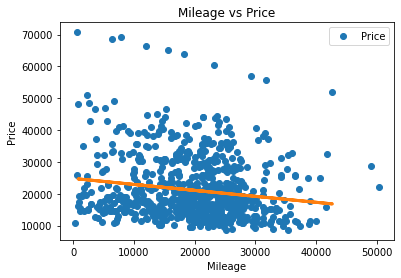

In [ ]:
df.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')

y=lir.coef_*X_test+lir.intercept_
plt.plot(X_test,y,linewidth=3)
plt.show()

In [ ]:
lir.score(X_test,Y_test)

#This equation is not the best fit for this data according to R2 score

0.0046002241438294345

# Task 2

In [ ]:
X = df.loc[:, ['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']].values
Y = df.loc[:, 'Price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)


from sklearn.linear_model import LinearRegression
lir = LinearRegression() 
lir.fit(X_train, Y_train)
Y_pred = lir.predict(X_test)
print('c:',lir.intercept_)
print('m:',lir.coef_)
y=(lir.coef_*X_test)+lir.intercept_
y

c: 7964.847204033491
m: [-2.01878350e-01  3.72454665e+03 -7.80884118e+02 -1.66055636e+03
  6.70811133e+03 -2.38969941e+03  3.73492338e+03]


array([[ 3489.40606477, 22863.03381045,  6715.43261555, ...,
         7964.84720403,  7964.84720403, 11699.77058546],
       [ 6730.56297265, 22863.03381045,  6246.90214487, ...,
        14672.95853593,  5575.14779715, 11699.77058546],
       [  975.61685163, 22863.03381045,  6715.43261555, ...,
         7964.84720403,  5575.14779715,  7964.84720403],
       ...,
       [ 3899.6228718 , 30312.12711366,  4997.48755638, ...,
        14672.95853593,  5575.14779715,  7964.84720403],
       [ 2826.43756365, 30312.12711366,  4997.48755638, ...,
        14672.95853593,  7964.84720403, 11699.77058546],
       [ 5877.82882261, 30312.12711366,  5231.75279172, ...,
        14672.95853593,  7964.84720403,  7964.84720403]])

In [ ]:
lir.score(X_test,Y_test)

#This equation is not the best fit for this data according to R2 score

0.46073399079223265

In [ ]:
df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather','Price']].corr()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price
Mileage,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005,-0.143051
Cylinder,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520,0.569086
Liter,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332,0.558146
Doors,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969,-0.138750
Cruise,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573,0.430851
Sound,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444,-0.124348
Leather,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000,0.157197
Price,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197,1.000000


In [ ]:
X = df.loc[:, ['Cylinder','Liter','Doors','Cruise','Sound','Leather']].values
Y = df.loc[:, 'Price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)


from sklearn.linear_model import LinearRegression
lir = LinearRegression() 
lir.fit(X_train, Y_train)
Y_pred = lir.predict(X_test)
lir.score(X_test,Y_test)# 'Cylinder','Liter','Doors','Cruise','Sound','Leather' features helps to predict the target with the better R2 score

0.4617884075926004

# Task 3

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
dummy_df=df.drop(['Trim'],axis=1)
dummy_df = pd.get_dummies(dummy_df,drop_first=False)
dummy_df

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,6,3.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X = dummy_df.iloc[:, 2:].values
Y = dummy_df.loc[:, 'Price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)


from sklearn.linear_model import LinearRegression
lir = LinearRegression() 
lir.fit(X_train, Y_train)
Y_pred = lir.predict(X_test)
lir.score(X_test,Y_test) #Except Mileage all other features helps to predict the target with the best R2 score

0.9478526374423476